# HW2

### Theory Questions (28%)

#### 1) To evaluate how well our model performs at death classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

Performance model is more significant than accuracy in our case. For example, when we have imbalance data (e.g. unequal samples of TN (90%) relative to TP (10%)), the accuracy will reflect an incorrect "high prediction" (derived from the accuracy equation) and will not tell us about the model's abilities to predict TP. Model performance is addressed this issue. For example 𝑆𝑒 and 𝑆𝑝 quantify the accuracy of the classifier in relation to the reference ("bottom truth"). 

#### 2) You are asked to design a ML algorithm to predict which patients are going to death from a heart attack. Relevant patient features for the algorithm may include Age, serum sodium, serum creatinine, gender, smoking, Blood Pressure (BP), Ejection Fraction (EF), anemia, platelets, Creatinine Phosphokinase (CPK) and diabetes. You should choose between two classifiers: the first uses only BP and EF features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

***classifiers 1- using only BP & EF:***

  pros:
  * Allows information 3D visualization.
  * Fast computing time.
  cons:
  * "Drop features" meaning a possible dismissing relevant data.
  * Achieving less robust model

***classifiers 2- using all features:***
  
  pros:
  * Using all the features create a more robust model.
     
  cons:
   * Computationaly time and data collecting cost.
   * Maigh lead to using of irrelevant or redundant features.
   * May obstruct interpretability

#### 3) Let’s consider that we have the choice between linear SVM and logistic regression. Give 2 notable differences between what you will obtain from these models. (You are not expected to give the mathematical definition but more practical differences).

In logistic regression, we map the value within the range of [0,1] by using the sigmoid function. logistic regression find the decision boundaries that near to optimal point (based on Maximum likelihood estimate- statistics approach). SVM is a geometric problem that finds the cental linear separation line between the support vector and creates a "margin zone".


#### 4) What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

As mentioned above (Q3) SVM finds the widest margin between the support vectors. The concept in this attitude is to create a more robust model that is less sensitive to over-fitting.

the difference in the concept of hyper-parameters tuning between SVM and LR is that in SVM the hyperparameter (C) state of much we penalize our model for misclassified and thereby we could "flex" our model- when the hyperparameter is high, then the penalty for each misclassified sample increase.

In logistic regression 𝜆  is a hyperparameter that also sets the penalization, when the higher 𝜆 is, the higher importance of the regularization term is. in this case, the model will be pushed towards lower weights in order to minimize the cost function.


In [43]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [44]:
import os
os.chdir('/content/drive/MyDrive/MLH/homework /hw2/hw2-reem-oriel')

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import log_loss, hinge_loss, confusion_matrix, plot_confusion_matrix, roc_auc_score
from tqdm import tqdm
import random
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from IPython.core.pylabtools import figsize
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


Data downloading

In [46]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv

--2022-01-04 13:24:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12239 (12K) [application/x-httpd-php]
Saving to: ‘heart_failure_clinical_records_dataset.csv.4’

heart_failure_clini 100%[===================>]  11.95K  --.-KB/s    in 0.001s  

2022-01-04 13:24:11 (11.4 MB/s) - ‘heart_failure_clinical_records_dataset.csv.4’ saved [12239/12239]



In [47]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [48]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


##Coding Assignment -Part B

**1)Load the data. Explain any preprocessing.**





In [49]:
#changing the values of Age and palateles to an integer because some values are not 
df = df.astype({'age':'int', 'platelets':'int'})

In [50]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000,1.4,140,1,1,280,0


**2)Perform a test-train split of 20% test**





In [51]:
x=df.loc[:,df.columns[:-1]]
y=df.loc[:,df.columns[-1]]

In [52]:
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, stratify=y)

**3) Provide detailed visualization and exploration of the data. (10%)
a. An analysis to show that the distribution of the features is similar between test and train.
b. Plots to show the relationship between feature and label.  
c. Additional plots that make sense given the mostly binary nature of this dataset.
d. State any insights you have** 

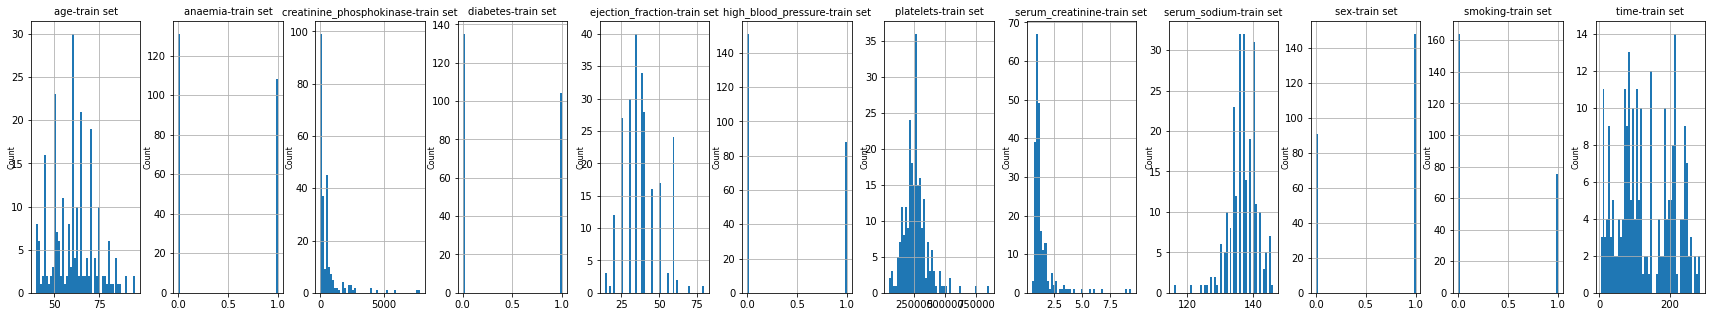

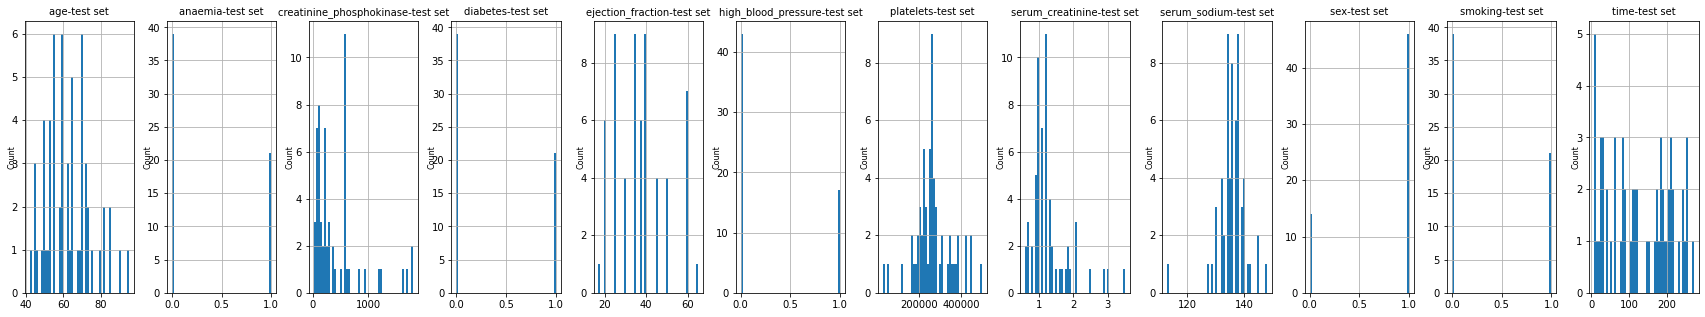

In [53]:
%matplotlib inline

axarr_train = x_train.hist(bins=50, figsize=(30, 5),layout=(1,12))  # histograms of dataframe variables
axarr_test= x_test.hist(bins=50, figsize=(30, 5),layout=(1,12))  # histograms of dataframe variables
xlbl = ['age','anaemia','creatinine_phosphokinase',	'diabetes',	'ejection_fraction'	,'high_blood_pressure'	,'platelets',	'serum_creatinine',	'serum_sodium',	'sex','smoking','time' ]

for idx, ax in enumerate(axarr_train.flatten()):

  ax.title.set_text(xlbl[idx]+"-train set")
  ax.title.set_size(fontsize=10)
  ax.set_ylabel("Count",verticalalignment='top', horizontalalignment='center',fontsize=8)


for idx, ax in enumerate(axarr_test.flatten()):
  ax.title.set_text(xlbl[idx]+"-test set")
  ax.title.set_size(fontsize=10)
  ax.set_ylabel("Count",verticalalignment='top', horizontalalignment='center',fontsize=8)

plt.show()

a.i.What issues could an imbalance of features between train and test cause?


if there is an imbalance of features between train and test sets, it can cause a bias for the model toward a specific class and that will affect the perfomance of the model and what the model predicts regardless to what are we suppose to get correctly for the test data


a.ii.How could you solve the issue?

Performing stratification in a way that different folds have the same classes proportion. 
so we can use the "stratify" option when splitting for data. 
which let the test and the trainset have a similar proportions of the features 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

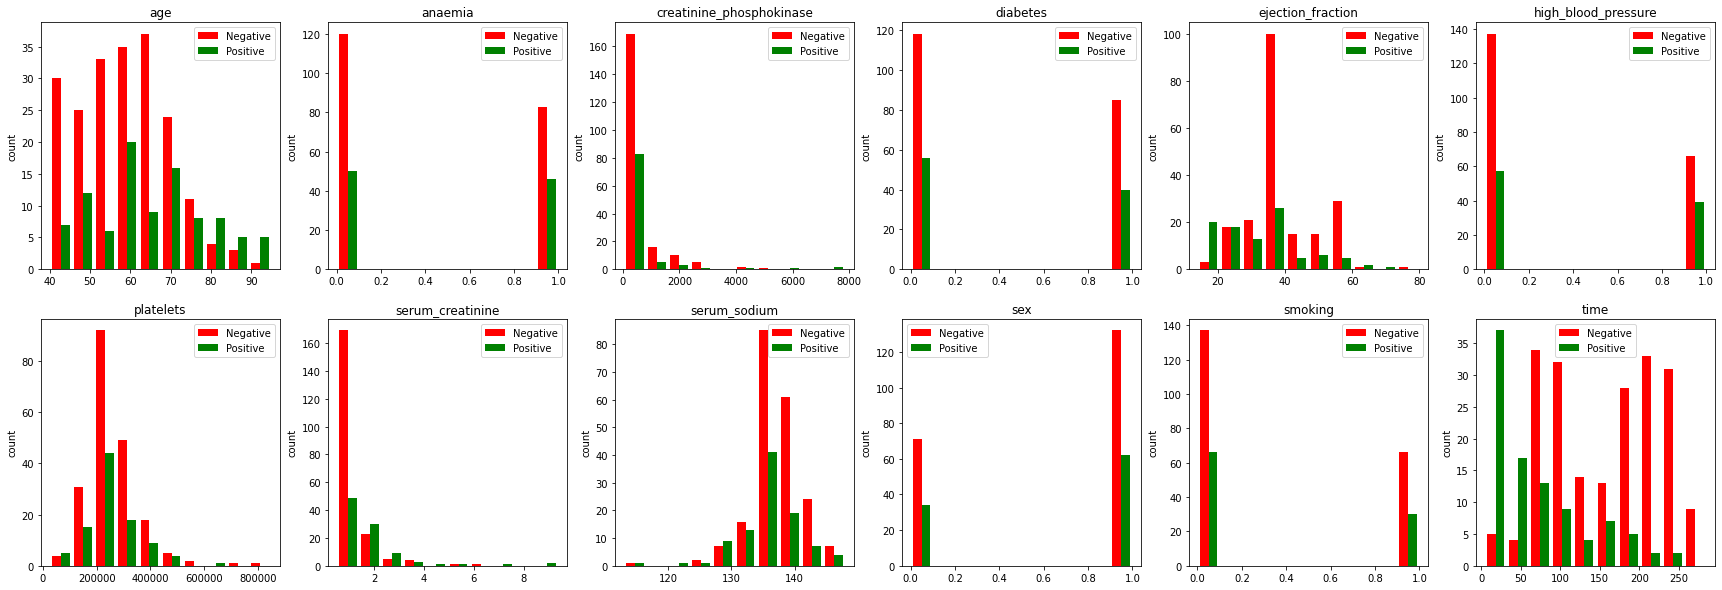

In [54]:

%matplotlib inline

xlbl = ['age','anaemia','creatinine_phosphokinase',	'diabetes',	'ejection_fraction'	,'high_blood_pressure'	,'platelets',	'serum_creatinine',	'serum_sodium',	'sex','smoking','time' ]
fig, ax = plt.subplots(nrows=2,ncols=6,figsize=(30,10))
row=0
for idx in  range(len(xlbl)):
  if idx>5:
    row=1
    col=idx-6
  else:
      col=idx
  neg=df[xlbl[idx]].loc[df["DEATH_EVENT"] == 0]
  pos=df[xlbl[idx]].loc[df["DEATH_EVENT"] == 1]
  ax[row,col].hist([neg,pos],color=["red","green"],label=["Negative","Positive"])
  ax[row,col].legend()
  ax[row,col].set_title(xlbl[idx])
  ax[row,col].set_ylabel("count")

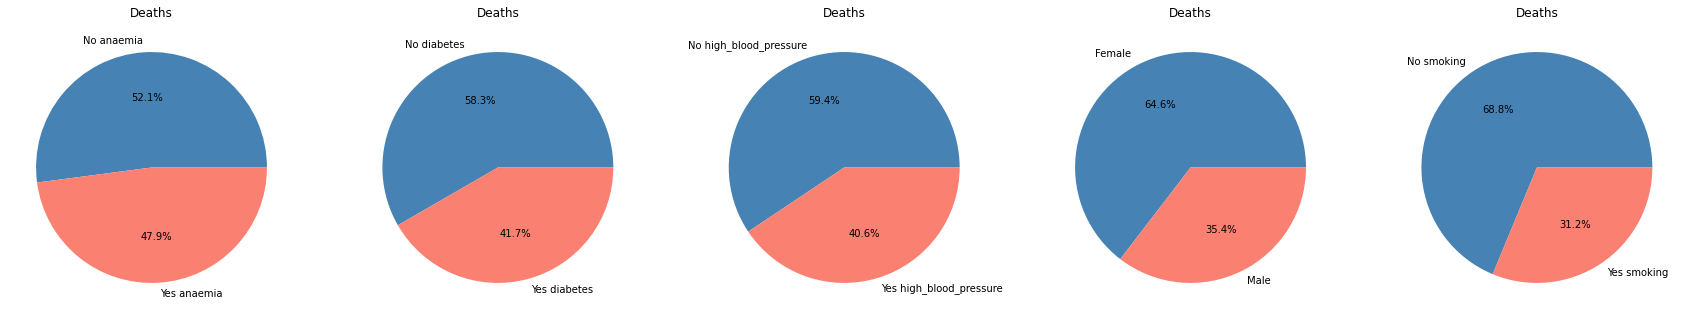

In [55]:

%matplotlib inline

xlbl = ['anaemia','diabetes',	'high_blood_pressure'	,	'sex','smoking' ]
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(30,10))

for col in  range(len(xlbl)):
  death=df[xlbl[col]].loc[df["DEATH_EVENT"] == 1]
  if xlbl[col]!='sex':
    labels=['No ' + xlbl[col],'Yes ' + xlbl[col]]
  else:
    labels=['Female ' ,'Male ']
  ax[col].set_title("Deaths")
  ax[col].pie(death.value_counts(), labels=labels, colors = ['steelblue', 'salmon'], autopct='%1.1f%%') 



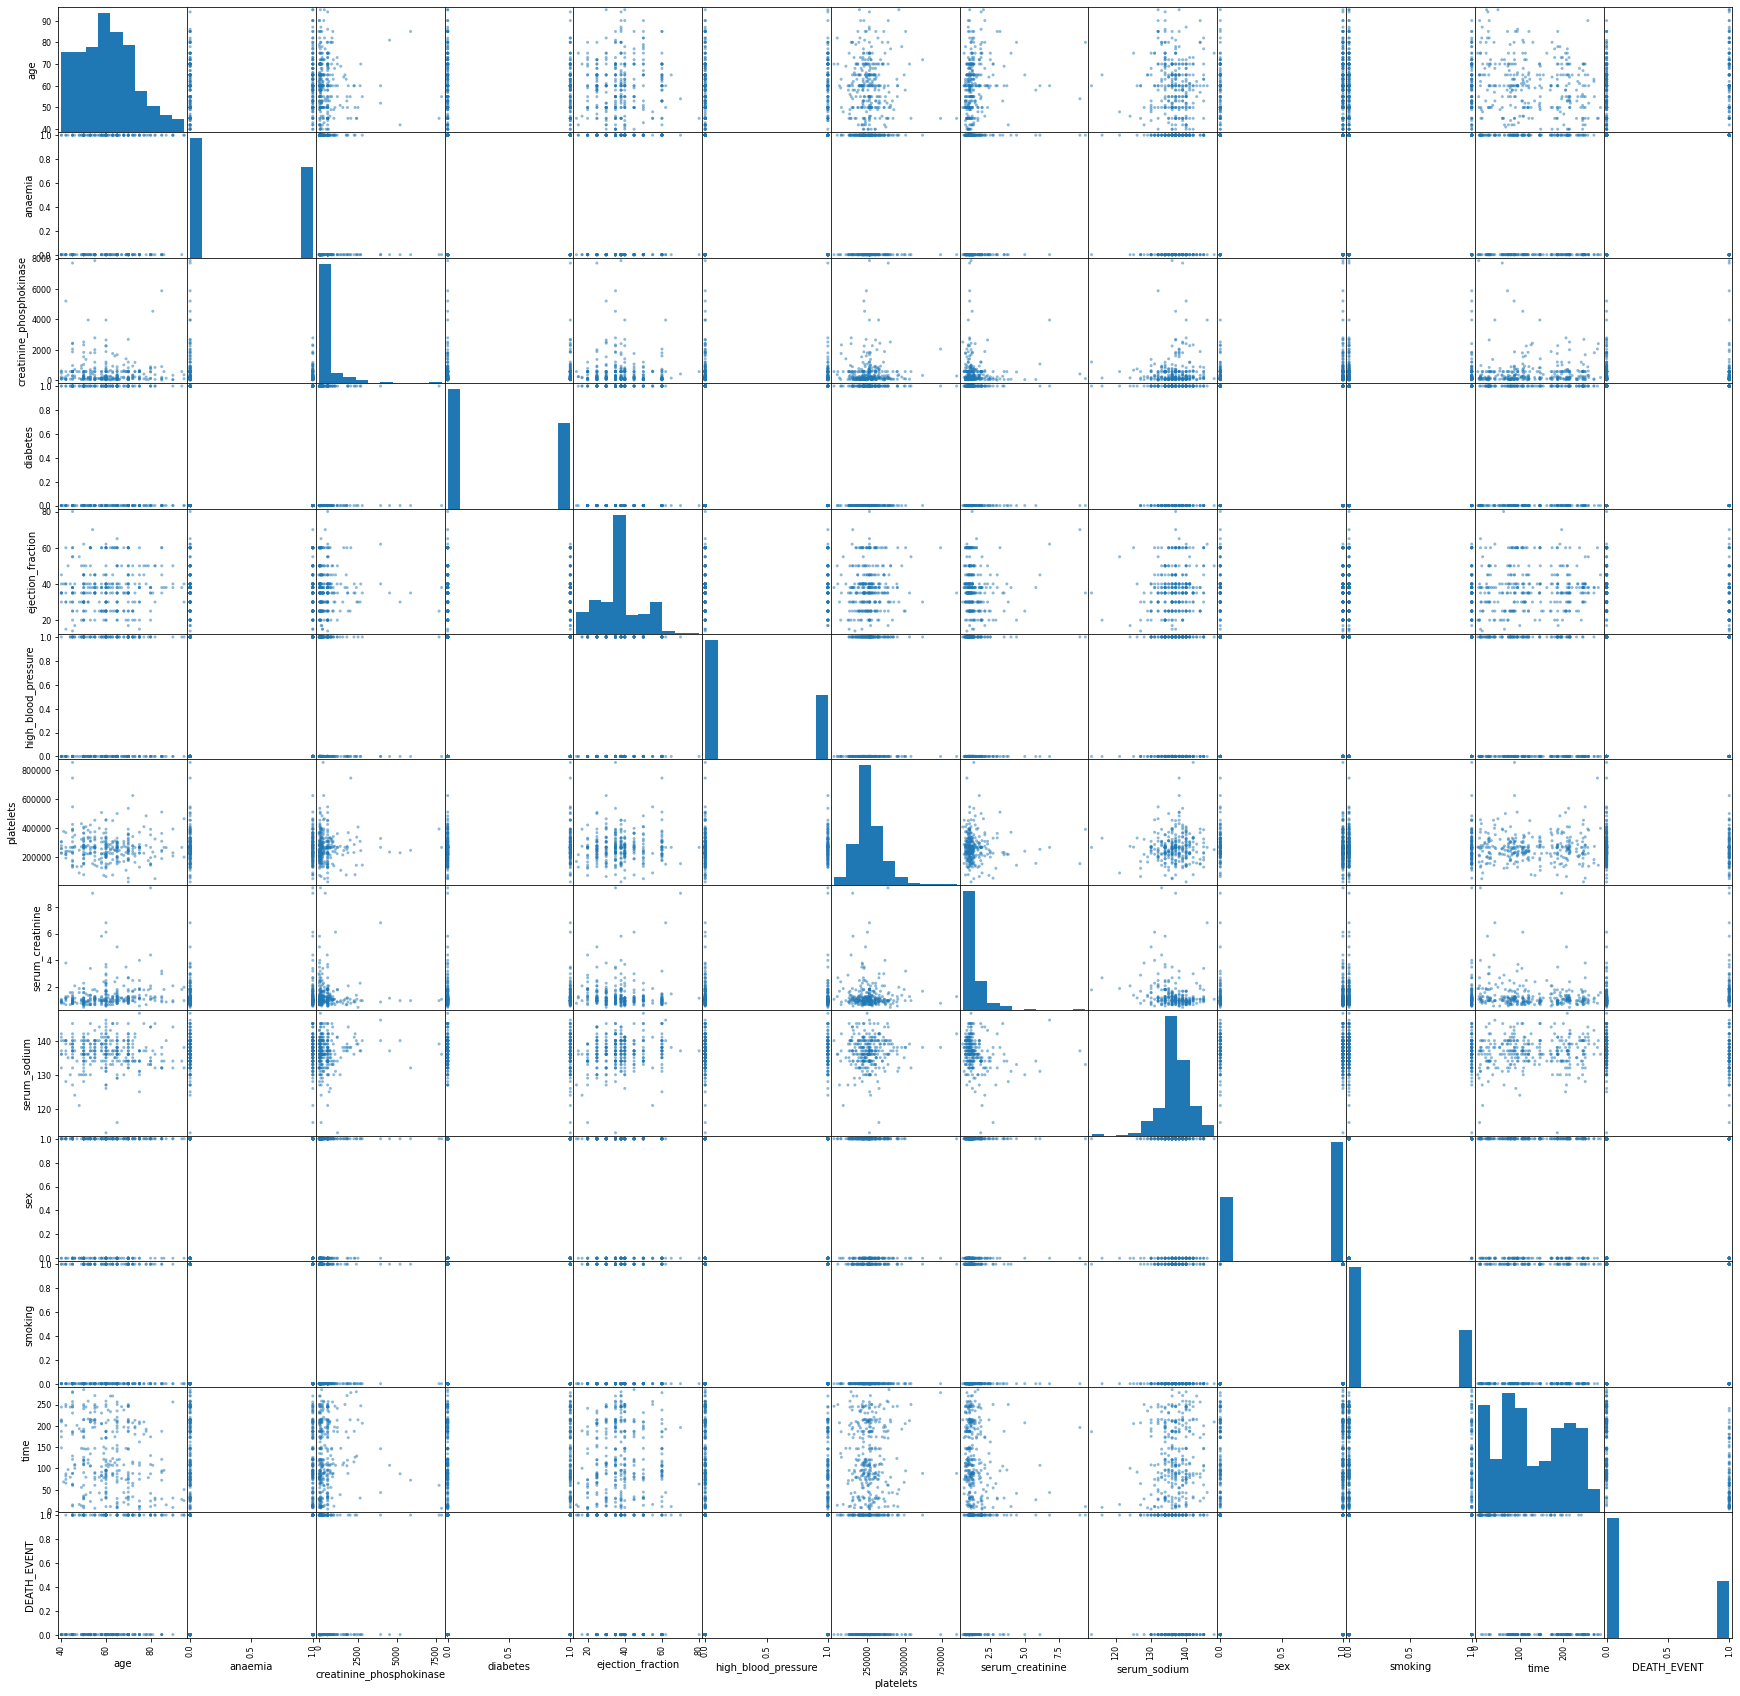

In [56]:
attributes = ['age','anaemia','creatinine_phosphokinase',	'diabetes',	'ejection_fraction'	,'high_blood_pressure'	,'platelets',	'serum_creatinine',	'serum_sodium',	'sex','smoking','time' ,"DEATH_EVENT"]
scatter_matrix(df[attributes], figsize=(30, 30)) # correlation between  variables
plt.show()

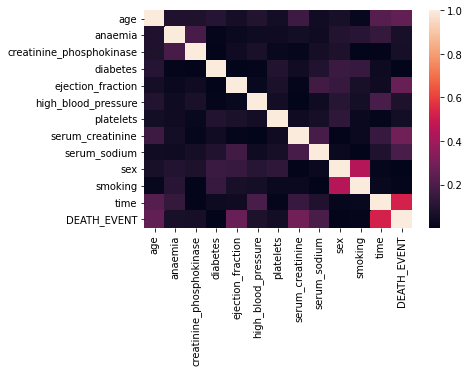

In [57]:
import seaborn as sns
sns.heatmap(abs(df.corr()))

d.i.Was there anything unexpected?

deaths among non smokers are higher that deaths amongs smokers, although the number of non smokers in the data is less than the smokers.which is not expected because we mostly think that smoking is have a high relationship with death and negative effects.





d.ii.Are there any features that you feel will be particularly important to your
model? Explain why.

in the histograms that shows the negative and the positive distribution in each feature, we can notics that we can see a swich  between change from negative to positive(as majority and minority) at a specific value of the feature which indicates  there can be a good relation between the feature and death .

also the correlation matrix indicates that higher correlations with death is for the features 
time(most important ) ,serum creatine ,ejection fraction  and age  

**5) Choose, build and optimize Machine Learning Models: (20%)
a. Use 5k cross fold validation and tune the models to achieve the highest test AUC:
i. Train one or more linear models on your training set
ii. Train one or more non-linear models on your training set
b. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS, 
ACC). 
c. What performs best on this dataset? Linear or non-linear models?**

In [58]:
def check_penalty(penalty='none'):
    if penalty == 'l1':
        solver='liblinear'
    if penalty == 'l2' or penalty == 'none':
        solver='lbfgs'
    return solver

In [59]:

calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]
def stats(y_test, y_pred_test):
 TN = calc_TN(y_test, y_pred_test)
 FP = calc_FP(y_test, y_pred_test)
 FN = calc_FN(y_test, y_pred_test)
 TP = calc_TP(y_test, y_pred_test)
 Se = TP/(TP+FN)
 Sp = TN/(TN+FP)
 PPV = TP/(TP+FP)
 NPV = TN/(TN+FN)
 Acc = (TP+TN)/(TP+TN+FP+FN)
 F1 = (2*Se*PPV)/(Se+PPV)
 return TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1


**a.logistic regression model**

9/9 lambda values, processed folds: 100%|██████████| 5/5 [00:00<00:00, 44.33it/s]


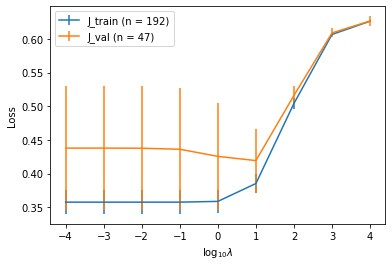

In [60]:
scaler = StandardScaler()
lmbda = np.array([0.0001, 0.001, 0.01,0.1, 1, 10, 100, 1000, 10000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
max_iter = 2000
J_train = np.zeros((2, len(lmbda)))
J_val = np.zeros((2, len(lmbda)))
pen='l2'
solver=check_penalty(penalty=pen)

for idx_lambda, lmb in enumerate(lmbda):
    C = 1/lmb
    #--------------------------Impelment your code here:-------------------------------------
    log_reg = LogisticRegression(random_state=5, penalty=pen, C = 1/lmb, max_iter=max_iter,solver=solver)
    #----------------------------------------------------------------------------------------
    with tqdm(total=n_splits, file=sys.stdout, position=0, leave=True) as pbar:
        h = 0 # index per split per lambda
        J_train_fold = np.zeros(n_splits)
        J_val_fold = np.zeros(n_splits)

        for train_index, val_index in skf.split(x_train, y_train):
            pbar.set_description('%d/%d lambda values, processed folds' % ((1 + idx_lambda), len(lmbda)))
            pbar.update()

            x_train_fold, x_val_fold = x_train.iloc[train_index,:], x_train.iloc[val_index,:]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            scaler = StandardScaler()


            x_train_fold= scaler.fit_transform(x_train_fold)
            x_val_fold = scaler.transform(x_val_fold)
            log_reg.fit(x_train_fold, y_train_fold)
            y_pred_train = log_reg.predict_proba(x_train_fold)
            J_train_fold[h] = log_loss(y_train_fold,y_pred_train)
            y_pred_val = log_reg.predict_proba(x_val_fold)
            J_val_fold[h] = log_loss(y_val_fold,y_pred_val)
            

            #----------------------------------------------------------------------------------------
            h += 1
        #--------------------------Impelment your code here:-------------------------------------
        J_train[0,idx_lambda]=J_train_fold.mean()
        J_val[0,idx_lambda]=J_val_fold.mean()
        J_train[1,idx_lambda]=J_train_fold.std()
        J_val[1,idx_lambda]=J_val_fold.std()
        #----------------------------------------------------------------------------------------
plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:]) 
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val (n = ' + str(x_val_fold.shape[0]) + ')'])


Accuracy is 0.7833. 
F1 is 0.6486. 
Loss is 0.3985. 
AUROC is 0.8768.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


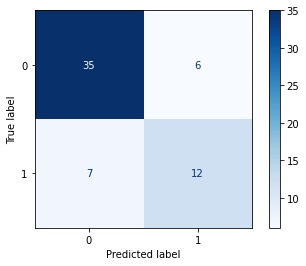

In [61]:

log_reg = LogisticRegression(random_state=5, penalty=pen, C = 1, max_iter=max_iter,solver=solver)
x_tr = scaler.fit_transform(x_train)
x_tst = scaler.transform(x_test)
log_reg.fit(x_tr, y_train)
y_pred_test = log_reg.predict(x_tst)
y_pred_proba_test = log_reg.predict_proba(x_tst)
plot_confusion_matrix(log_reg, x_tst, y_test, cmap=plt.cm.Blues)
plt.grid(False)
#-----------------------------------------------------------------------------------------
TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(y_test, y_pred_test)
Loss = log_loss(y_test,  y_pred_proba_test)
print('\nAccuracy is {:.4f}. \nF1 is {:.4f}. \nLoss is {:.4f}. '.format(Acc,F1,Loss))
print('AUROC is {:.4f}.'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


**b.non linear svm model**

In [62]:
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe,
 param_grid={'svm__kernel':['rbf','poly'], 'svm__C':1/lmbda, 'svm__degree':[3]},
 scoring=['accuracy','f1','roc_auc','precision','recall'],cv=skf, refit='f1', verbose=3, return_train_score=True)
svm_nonlin.fit(x_train, y_train)
best_svm_nonlin = svm_nonlin.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END svm__C=10000.0, svm__degree=3, svm__kernel=rbf; accuracy: (train=1.000, test=0.667) f1: (train=1.000, test=0.500) precision: (train=1.000, test=0.471) recall: (train=1.000, test=0.533) roc_auc: (train=1.000, test=0.723) total time=   0.0s
[CV 2/5] END svm__C=10000.0, svm__degree=3, svm__kernel=rbf; accuracy: (train=1.000, test=0.833) f1: (train=1.000, test=0.692) precision: (train=1.000, test=0.818) recall: (train=1.000, test=0.600) roc_auc: (train=1.000, test=0.915) total time=   0.0s
[CV 3/5] END svm__C=10000.0, svm__degree=3, svm__kernel=rbf; accuracy: (train=1.000, test=0.771) f1: (train=1.000, test=0.621) precision: (train=1.000, test=0.692) recall: (train=1.000, test=0.562) roc_auc: (train=1.000, test=0.812) total time=   0.0s
[CV 4/5] END svm__C=10000.0, svm__degree=3, svm__kernel=rbf; accuracy: (train=1.000, test=0.708) f1: (train=1.000, test=0.533) precision: (train=1.000, test=0.571) recall: (train=1.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined a

[CV 1/5] END svm__C=0.1, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.953, test=0.832) total time=   0.0s
[CV 2/5] END svm__C=0.1, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.944, test=0.897) total time=   0.0s
[CV 3/5] END svm__C=0.1, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.963, test=0.844) total time=   0.0s
[CV 4/5] END svm__C=0.1, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.960, test=0.867) total time=   0.0s
[CV 5/5]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END svm__C=0.1, svm__degree=3, svm__kernel=poly; accuracy: (train=0.717, test=0.688) f1: (train=0.229, test=0.000) precision: (train=1.000, test=0.000) recall: (train=0.129, test=0.000) roc_auc: (train=0.953, test=0.840) total time=   0.0s
[CV 2/5] END svm__C=0.1, svm__degree=3, svm__kernel=poly; accuracy: (train=0.712, test=0.688) f1: (train=0.203, test=0.000) precision: (train=1.000, test=0.000) recall: (train=0.113, test=0.000) roc_auc: (train=0.947, test=0.871) total time=   0.0s
[CV 3/5] END svm__C=0.1, svm__degree=3, svm__kernel=poly; accuracy: (train=0.707, test=0.688) f1: (train=0.152, test=0.118) precision: (train=1.000, test=1.000) recall: (train=0.082, test=0.062) roc_auc: (train=0.958, test=0.824) total time=   0.0s
[CV 4/5] END svm__C=0.1, svm__degree=3, svm__kernel=poly; accuracy: (train=0.723, test=0.688) f1: (train=0.232, test=0.118) precision: (train=1.000, test=1.000) recall: (train=0.131, test=0.062) roc_auc: (train=0.969, test=0.871) total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined a

[CV 2/5] END svm__C=0.01, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.945, test=0.897) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.963, test=0.844) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.961, test=0.867) total time=   0.0s
[CV 5/5] END svm__C=0.01, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.677, test=0.681) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.948, test=0.898) total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined a

[CV 2/5] END svm__C=0.01, svm__degree=3, svm__kernel=poly; accuracy: (train=0.696, test=0.688) f1: (train=0.121, test=0.000) precision: (train=1.000, test=0.000) recall: (train=0.065, test=0.000) roc_auc: (train=0.907, test=0.869) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=3, svm__kernel=poly; accuracy: (train=0.696, test=0.667) f1: (train=0.094, test=0.000) precision: (train=1.000, test=0.000) recall: (train=0.049, test=0.000) roc_auc: (train=0.930, test=0.814) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=3, svm__kernel=poly; accuracy: (train=0.696, test=0.688) f1: (train=0.094, test=0.118) precision: (train=1.000, test=1.000) recall: (train=0.049, test=0.062) roc_auc: (train=0.934, test=0.871) total time=   0.0s
[CV 5/5] END svm__C=0.01, svm__degree=3, svm__kernel=poly; accuracy: (train=0.693, test=0.681) f1: (train=0.092, test=0.000) precision: (train=1.000, test=0.000) recall: (train=0.048, test=0.000) roc_auc: (train=0.916, test=0.890) total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined a

[CV 3/5] END svm__C=0.001, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.962, test=0.855) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.957, test=0.863) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.677, test=0.681) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.951, test=0.892) total time=   0.0s
[CV 1/5] END svm__C=0.001, svm__degree=3, svm__kernel=poly; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.917, test=0.792) total time=   0.0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined a

[CV 4/5] END svm__C=0.001, svm__degree=3, svm__kernel=poly; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.933, test=0.879) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__degree=3, svm__kernel=poly; accuracy: (train=0.677, test=0.681) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.910, test=0.879) total time=   0.0s
[CV 1/5] END svm__C=0.0001, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.953, test=0.832) total time=   0.0s
[CV 2/5] END svm__C=0.0001, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.944, test=0.889) total time=   0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined a

[CV 4/5] END svm__C=0.0001, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.956, test=0.863) total time=   0.0s
[CV 5/5] END svm__C=0.0001, svm__degree=3, svm__kernel=rbf; accuracy: (train=0.677, test=0.681) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.946, test=0.881) total time=   0.0s
[CV 1/5] END svm__C=0.0001, svm__degree=3, svm__kernel=poly; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.910, test=0.778) total time=   0.0s
[CV 2/5] END svm__C=0.0001, svm__degree=3, svm__kernel=poly; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) roc_auc: (train=0.896, test=0.838) total time=  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Accuracy is 0.8000. 
F1 is 0.6667. 
Loss is 0.3985. 
AUROC is 0.8331.


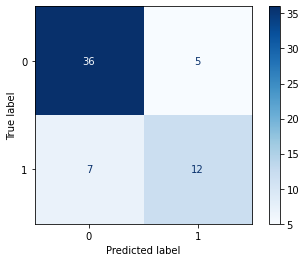

In [63]:
y_pred_test = best_svm_nonlin.predict(x_test) #NOTICE NOT TO USE THE STANDARDIZED DA
y_pred_proba_test = best_svm_nonlin.predict_proba(x_test)
plot_confusion_matrix(best_svm_nonlin,x_test,y_test, cmap=plt.cm.Blues)
plt.grid(False)
TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(y_test, y_pred_test)
print('\nAccuracy is {:.4f}. \nF1 is {:.4f}. \nLoss is {:.4f}. '.format(Acc,F1,Loss))
print('AUROC is {:.4f}.'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


What performs best on this dataset? Linear or non-linear models?


non linear model perfoms better on the test data with f1=0.66

**6) Feature Selection**


Accuracy is 0.8167. 
F1 is 0.7317. 
Loss is 0.3985. 
AUROC is 0.8999.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


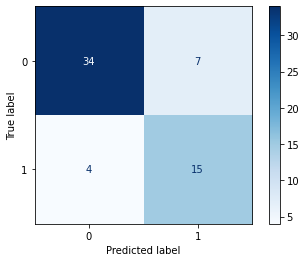

In [64]:
#C8

rfc = Pipeline(steps=[('scale', StandardScaler()), ('rfc', RandomForestClassifier(max_depth=4, random_state=336546, criterion='gini'))])
#--------------------------Impelment your code here:-------------------------------------
rfc.fit(x_train, y_train)
y_pred_test = rfc.predict(x_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = rfc.predict_proba(x_test)
plot_confusion_matrix(rfc,x_test,y_test, cmap=plt.cm.Blues)
plt.grid(False)
#-----------------------------------------------------------------------------------------
TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(y_test, y_pred_test)
print('\nAccuracy is {:.4f}. \nF1 is {:.4f}. \nLoss is {:.4f}. '.format(Acc,F1,Loss))
print('AUROC is {:.4f}.'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

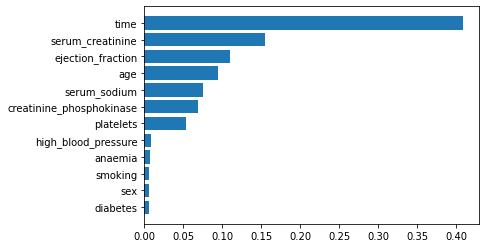

In [65]:
features=df.columns.values
feature_importances = (rfc.named_steps['rfc'].feature_importances_)
f_i = list(zip(features,feature_importances))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

i.What are the 2 most important features according to the random forest.

A shown time and creatinine serum 

ii. Does this match up exactly with the feature exploration you did?

yes it does match what we saw in the correlation matrix and what we visualize in the histograms

**7)Data Separability Visualization**

a. Perform dimensionality reduction on the dataset so that you can plot your data in a 
2d plot (show samples with positive and negative labels in different colors). 

In [66]:
n_components=2
pca = PCA(n_components,whiten=True)
x_train_pca=pca.fit_transform(scaler.fit_transform(x_train))
x_test_pca=pca.fit_transform(scaler.fit_transform(x_test))

In [67]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='g')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')
    

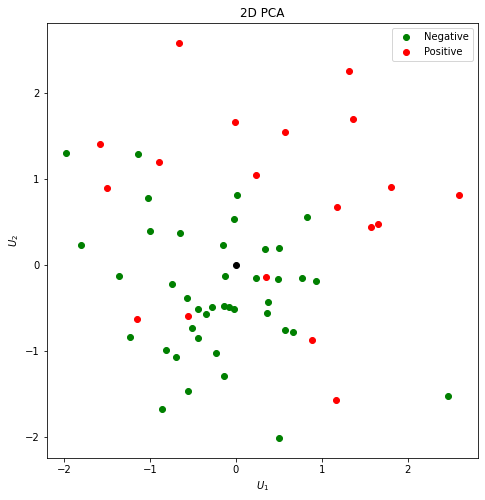

In [68]:
plt_2d_pca(x_test_pca,y_test)

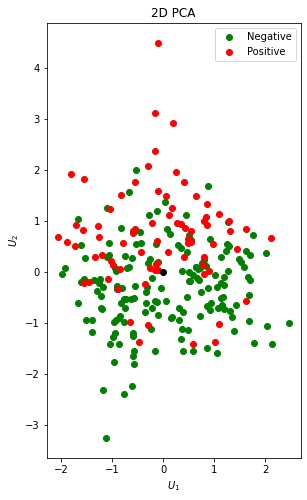

In [69]:
plt_2d_pca(x_train_pca,y_train)

b. How separable is your data when reduced to just two features?

the data is not totally separable because we can see that some observations of one the positive class falls on the negative one 

c. Train the same models above on the dimensionality-reduced training set.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Accuracy is 0.7667. 
F1 is 0.5625. 
Loss is 0.3985. 
AUROC is 0.7638.


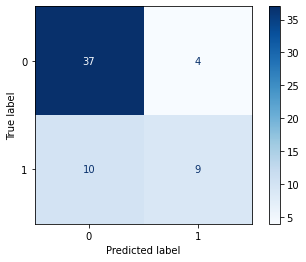

In [70]:
x_tr = x_train_pca
x_tst = x_test_pca
log_reg.fit(x_tr, y_train)
y_pred_test = log_reg.predict(x_tst)
y_pred_proba_test = log_reg.predict_proba(x_tst)
plot_confusion_matrix(log_reg, x_tst, y_test, cmap=plt.cm.Blues)
plt.grid(False)
TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(y_test, y_pred_test)
print('\nAccuracy is {:.4f}. \nF1 is {:.4f}. \nLoss is {:.4f}. '.format(Acc,F1,Loss))
print('AUROC is {:.4f}.'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Accuracy is 0.7667. 
F1 is 0.5625. 
Loss is 0.5143. 
AUROC is 0.7433.


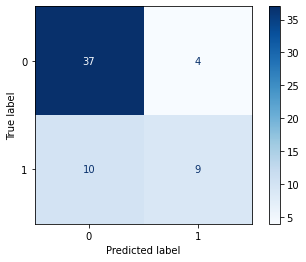

In [71]:
best_svm_nonlin.fit(x_train_pca, y_train)
y_pred_test = best_svm_nonlin.predict(x_test_pca) #NOTICE NOT TO USE THE STANDARDIZED DA
y_pred_proba_test = best_svm_nonlin.predict_proba(x_test_pca)
plot_confusion_matrix(best_svm_nonlin,x_test_pca,y_test, cmap=plt.cm.Blues)
plt.grid(False)
TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(y_test, y_pred_test)
Loss = log_loss(y_test,  y_pred_proba_test)
print('\nAccuracy is {:.4f}. \nF1 is {:.4f}. \nLoss is {:.4f}. '.format(Acc,F1,Loss))
print('AUROC is {:.4f}.'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

d. Train the same models on the best two features from section 6. 

In [72]:
x_train_2f=x_train.loc[:,['time','serum_creatinine']]
x_test_2f=x_test.loc[:,['time','serum_creatinine']]



Accuracy is 0.8333. 
F1 is 0.7222. 
Loss is 0.5143. 
AUROC is 0.8793.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


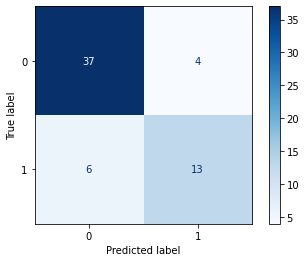

In [73]:
x_tr = scaler.fit_transform(x_train_2f)
x_tst = scaler.transform(x_test_2f)
log_reg.fit(x_tr, y_train)
y_pred_test = log_reg.predict(x_tst)
y_pred_proba_test = log_reg.predict_proba(x_tst)
plot_confusion_matrix(log_reg, x_tst, y_test, cmap=plt.cm.Blues)
plt.grid(False)
TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(y_test, y_pred_test)
print('\nAccuracy is {:.4f}. \nF1 is {:.4f}. \nLoss is {:.4f}. '.format(Acc,F1,Loss))
print('AUROC is {:.4f}.'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Accuracy is 0.8333. 
F1 is 0.7368. 
Loss is 0.4396. 
AUROC is 0.8793.


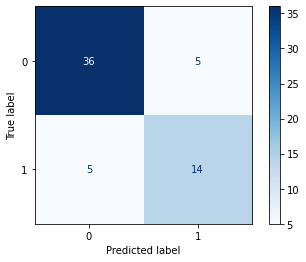

In [74]:
best_svm_nonlin.fit(x_train_2f, y_train)
y_pred_test = best_svm_nonlin.predict(x_test_2f) #NOTICE NOT TO USE THE STANDARDIZED DA
y_pred_proba_test = best_svm_nonlin.predict_proba(x_test_2f)
plot_confusion_matrix(best_svm_nonlin,x_test_2f,y_test, cmap=plt.cm.Blues)
plt.grid(False)
TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 = stats(y_test, y_pred_test)
Loss = log_loss(y_test,  y_pred_proba_test)
print('\nAccuracy is {:.4f}. \nF1 is {:.4f}. \nLoss is {:.4f}. '.format(Acc,F1,Loss))
print('AUROC is {:.4f}.'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

 e. What performs better? 
 
best two features performs better than pca if we look at the f1 score 

pca:
---------------------
Logreg : f1 = 0.56
non-linear svm: f1 = 0.56 


best two features:
------------------
Logreg : f1 = 0.72
non-linear svm:      f1= 0.73